#Dense neural network for classification

Required imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


In [0]:
df = pd.read_csv('train.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,label
0,-999.000,94.267,56.592,44.055,2.474,204.589,0.749,1.381,18.238,231.606,1.150,-1.100,0.933,41.223,1.418,-1.895,47.391,1.184,3.027,71.775,1.145,451.349,3,68.206,0.273,-0.572,43.346,2.747,2.699,142.992,0
1,175.895,8.281,96.004,26.597,-999.000,-999.000,-999.000,2.957,4.658,131.113,0.505,1.349,-999.000,66.979,-0.681,0.831,33.829,-0.354,-2.107,45.967,-1.897,190.318,1,30.306,-1.900,2.186,-999.000,-999.000,-999.000,30.306,1
2,108.990,11.094,67.990,41.397,-999.000,-999.000,-999.000,3.013,2.026,111.415,1.171,-1.363,-999.000,31.367,-1.027,1.518,36.740,-0.860,-1.490,36.856,-1.793,130.868,1,43.309,1.313,1.502,-999.000,-999.000,-999.000,43.309,1
3,131.516,46.504,89.693,8.039,-999.000,-999.000,-999.000,3.153,8.039,87.773,1.239,-1.414,-999.000,39.204,-2.004,-2.237,48.569,-1.534,0.928,12.935,-1.448,143.520,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1
4,-999.000,71.995,73.582,1.615,-999.000,-999.000,-999.000,2.231,1.615,77.546,1.155,-1.412,-999.000,35.983,0.127,-1.249,41.562,-0.640,2.939,39.659,0.759,83.474,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0


Dataset processing

In [0]:
df_nanflag = df.drop(['label'], axis='columns').copy()
for i in range(30):
  i = str(i)
  df_nanflag[i] = df_nanflag[i].apply(lambda x: 1 if(x==-999) else 0)
df_nanflag = df_nanflag.mean().to_frame('nan_mean')
df_nanflag = df_nanflag[df_nanflag['nan_mean']>=0.3]
df_nanflag = df_nanflag.reset_index()
df_nanflag

,index,nan_mean
0,4,0.709217
1,5,0.709217
2,6,0.709217
3,12,0.709217
4,23,0.398994
5,24,0.398994
6,25,0.398994
7,26,0.709217
8,27,0.709217
9,28,0.709217


In [0]:
for i in np.asarray(df_nanflag['index']):
    df.drop([i], axis='columns', inplace=True)

In [0]:
df.head(15)

,1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,29,label
0,94.267,56.592,44.055,1.381,18.238,231.606,1.150,-1.100,41.223,1.418,-1.895,47.391,1.184,3.027,71.775,1.145,451.349,3,142.992,0
1,8.281,96.004,26.597,2.957,4.658,131.113,0.505,1.349,66.979,-0.681,0.831,33.829,-0.354,-2.107,45.967,-1.897,190.318,1,30.306,1
2,11.094,67.990,41.397,3.013,2.026,111.415,1.171,-1.363,31.367,-1.027,1.518,36.740,-0.860,-1.490,36.856,-1.793,130.868,1,43.309,1
3,46.504,89.693,8.039,3.153,8.039,87.773,1.239,-1.414,39.204,-2.004,-2.237,48.569,-1.534,0.928,12.935,-1.448,143.520,0,0.000,1
4,71.995,73.582,1.615,2.231,1.615,77.546,1.155,-1.412,35.983,0.127,-1.249,41.562,-0.640,2.939,39.659,0.759,83.474,0,0.000,0
5,71.316,91.328,95.370,2.015,17.477,223.545,0.755,1.115,62.083,1.828,-3.074,46.895,1.732,1.196,41.117,3.092,258.095,2,114.568,1
6,49.994,73.949,1.169,2.667,55.771,112.173,0.928,-1.412,29.709,-0.163,0.073,27.558,1.560,-1.962,31.155,2.277,50.963,1,54.906,1
7,145.828,186.694,0.273,3.890,0.273,113.898,3.265,-1.246,26.707,-0.454,0.031,87.190,2.105,2.961,61.098,-0.270,103.389,0,0.000,0
8,20.091,65.143,37.148,2.480,20.599,117.970,0.858,1.409,36.562,-0.671,2.226,31.386,-0.274,-0.222,14.432,0.761,208.236,1,50.022,1
9,3.593,210.087,28.593,4.017,28.593,97.846,1.215,0.129,44.183,0.635,2.229,53.663,-2.176,-1.184,15.844,-1.061,77.835,0,-0.000,0


In [0]:
df_nolabel = df.drop(['label'], axis='columns')
df_nolabel = df_nolabel - df_nolabel.mean(axis=0)
df_nolabel = df_nolabel/df_nolabel.std(axis=0)

df = df_nolabel.join(df[['label']])
df

,0,1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,29,label
0,-2.336077,1.275615,-0.603647,-0.218303,-1.264141,-0.029121,0.633559,-0.339130,-0.815500,0.109874,1.177297,-1.036993,0.032301,0.949479,1.643104,0.914273,0.639778,1.914040,2.065595,0.716528,0
1,0.553956,-1.158290,0.365828,-0.492238,0.748260,-0.634180,-0.237058,-1.101037,1.236447,1.256987,-0.551974,0.462334,-0.580765,-0.265482,-1.184913,0.130196,-1.039453,-0.155289,0.019861,-0.437789,1
2,0.389381,-1.078665,-0.323273,-0.260010,0.819767,-0.751449,-0.407711,-0.314324,-1.035860,-0.329089,-0.837028,0.840191,-0.449174,-0.665202,-0.845045,-0.146607,-0.982043,-0.626580,0.019861,-0.304591,1
3,0.444791,-0.076356,0.210587,-0.783434,0.998533,-0.483539,-0.612532,-0.233999,-1.078592,0.019953,-1.641934,-1.225096,0.085552,-1.197636,0.486889,-0.873354,-0.791598,-0.526281,-1.003006,-0.748233,1
4,-2.336077,0.645187,-0.185719,-0.884234,-0.178772,-0.769761,-0.701134,-0.333224,-1.076916,-0.123503,0.113701,-0.681687,-0.231197,-0.491411,1.594630,-0.061448,0.426700,-1.002296,-1.003006,-0.748233,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,0.383911,1.091372,-0.078076,-0.036678,-0.201756,1.437543,-0.331429,0.573977,0.651613,-0.380887,1.614764,-1.157995,0.515719,1.050594,1.104381,-0.082290,-1.033932,0.497186,0.019861,-0.421143,0
174996,0.370505,0.173584,-0.191007,-0.346688,0.701015,-0.817123,0.459172,1.233115,1.287558,-0.701736,0.684632,-0.681137,0.469972,0.347528,1.156160,-0.681376,-1.187945,-0.155701,1.042728,0.597825,0
174997,0.383807,-1.114614,-0.339090,-0.273645,0.188976,0.369736,-0.458973,-0.816355,1.198743,0.053890,-0.263625,-0.613485,-0.762578,-0.628864,1.455267,-0.488759,1.688054,-0.401565,0.019861,-0.382278,1
174998,0.698598,0.474475,2.522499,-0.573126,1.303714,0.113633,-0.259115,-0.315505,-1.078592,0.913112,-0.003287,1.721856,1.023096,1.433725,0.115622,-0.273418,-0.697755,-0.212795,-1.003006,-0.748233,0


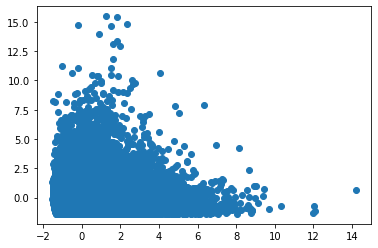

In [0]:
import matplotlib.pyplot as plt

plt.scatter(df[['21']], df[['1']])
plt.show()

Split into train and test:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.label, train_size=0.7)

Model architecture

In [0]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    #Dense(64, activation='relu'),
    #Dense(128, activation='relu'),
    #Dense(500, activation='sigmoid'),
    Dropout(0.25),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


Set optimizer and loss

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Run model fit

In [0]:
history = model.fit(X_train.values, y_train, epochs=25, batch_size=512, validation_split=0.2)

Train on 97999 samples, validate on 24500 samples
Epoch 1/25
97999/97999 [==============================] - 1s 7us/step - loss: 0.5370 - accuracy: 0.7225 - val_loss: 0.4726 - val_accuracy: 0.7826
Epoch 2/25
97999/97999 [==============================] - 1s 5us/step - loss: 0.4621 - accuracy: 0.7828 - val_loss: 0.4375 - val_accuracy: 0.8028
Epoch 3/25
97999/97999 [==============================] - 1s 6us/step - loss: 0.4413 - accuracy: 0.7956 - val_loss: 0.4240 - val_accuracy: 0.8122
Epoch 4/25
97999/97999 [==============================] - 1s 6us/step - loss: 0.4307 - accuracy: 0.8031 - val_loss: 0.4169 - val_accuracy: 0.8149
Epoch 5/25
97999/97999 [==============================] - 1s 6us/step - loss: 0.4270 - accuracy: 0.8048 - val_loss: 0.4121 - val_accuracy: 0.8176
Epoch 6/25
97999/97999 [==============================] - 1s 5us/step - loss: 0.4228 - accuracy: 0.8080 - val_loss: 0.4087 - val_accuracy: 0.8200
Epoch 7/25
97999/97999 [==============================] - 1s 6us/step - lo

Loss visualization

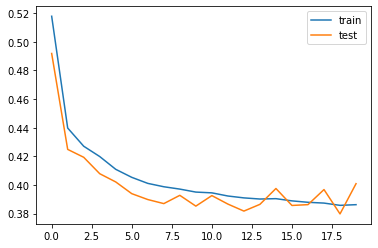

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Metrics visualization

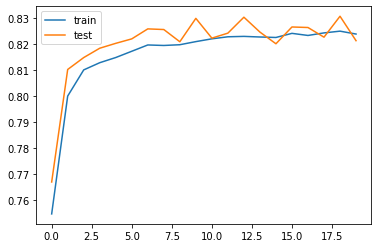

In [0]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Classification report

In [0]:
pred = model.predict(X_test) > 0.5
print(classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     0.8491    0.8859    0.8671     34359
           1     0.7646    0.7018    0.7319     18142

    accuracy                         0.8223     52501
   macro avg     0.8069    0.7939    0.7995     52501
weighted avg     0.8199    0.8223    0.8204     52501



In [0]:
test = pd.read_csv('test.csv')

In [0]:
for i in np.asarray(df_nanflag['index']):
    test.drop([i], axis='columns', inplace=True)

In [0]:
predicted = model.predict(test) > 0.5
pd.DataFrame({'Predicted': predicted.ravel().astype(int)}).to_csv('/content/drive/My Drive/Colab Notebooks/solution.csv', index_label='Id')

In [0]:
predicted.ravel().astype(int)

array([0, 0, 1, ..., 0, 0, 1])